## Import Required Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

## PART I: Initial Data Analysis And Preprocessing

### Overview

This is the IDA and Preprocessing component of this solution. The workflow for this notebook is outlined as follows:
- Getting the data
- First insights: Making sense of the data

## 1. Import the data

In [2]:
data = pd.read_csv("data_file.csv")
data.head()

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


## 2. Data Inspection

In [3]:
data_dim = data.shape

print(f"This data has {data_dim[0]} Rows and {data_dim[1]} Columns")

This data has 62485 Rows and 18 Columns


## Part II: Exploratory Data Analysis and Feature Engineering
<h4><b>Overview</b></h4>

This is the EDA component of this solution. The workflow for this notebook is outlined as follows:
- Data cleaning/manipulation
- Multivariate Exploratory Analysis
- Splitting the data (Using K-fold and single split)

## 1. Checking for null or unwanted values

In [4]:
data.isnull().sum()

FileName              0
md5Hash               0
Machine               0
DebugSize             0
DebugRVA              0
MajorImageVersion     0
MajorOSVersion        0
ExportRVA             0
ExportSize            0
IatVRA                0
MajorLinkerVersion    0
MinorLinkerVersion    0
NumberOfSections      0
SizeOfStackReserve    0
DllCharacteristics    0
ResourceSize          0
BitcoinAddresses      0
Benign                0
dtype: int64

## 2. Exploration

In [5]:
data.describe()

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
count,62485.000000,6.248500e+04,6.248500e+04,62485.000000,62485.000000,6.248500e+04,6.248500e+04,6.248500e+04,62485.000000,62485.000000,62485.000000,6.248500e+04,62485.000000,6.248500e+04,62485.000000,62485.000000
mean,6756.472657,2.587048e+04,1.541611e+05,58.785997,5.417524,8.953186e+05,4.094623e+05,1.466311e+05,9.782604,6.613171,4.751172,8.759830e+05,12966.031400,1.844664e+05,0.018004,0.433992
std,13345.499919,6.461396e+06,1.903142e+06,1114.068244,2.543697,3.779527e+07,2.851820e+07,1.124630e+06,9.047157,16.976465,2.138584,6.288189e+05,15762.725511,1.732625e+07,0.132968,0.495628
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,332.000000,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000e+00,0.000000e+00,4.096000e+03,6.000000,0.000000,3.000000,2.621440e+05,0.000000,1.080000e+03,0.000000,0.000000
50%,332.000000,0.000000e+00,0.000000e+00,0.000000,5.000000,0.000000e+00,0.000000e+00,8.520000e+03,9.000000,0.000000,5.000000,1.048576e+06,320.000000,2.496000e+03,0.000000,0.000000
75%,332.000000,2.800000e+01,1.283200e+04,6.000000,6.000000,2.875200e+04,1.040000e+02,6.553600e+04,11.000000,10.000000,6.000000,1.048576e+06,32768.000000,2.350400e+04,0.000000,1.000000
max,43620.000000,1.615155e+09,2.852127e+08,63325.000000,260.000000,2.147484e+09,2.415919e+09,6.615450e+07,255.000000,255.000000,33.000000,1.677722e+07,58632.000000,4.294942e+09,1.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinAddresses    62

In [7]:
data["DebugSize"].value_counts()

0             36521
28            12719
84             8974
56             4087
112              89
1                55
536               9
257               6
32                3
30                3
512               3
140               2
109               1
256               1
102               1
1236              1
49                1
16                1
17                1
1615155235        1
135               1
4                 1
10                1
1056              1
276               1
1072              1
Name: DebugSize, dtype: int64

In [8]:
data["NumberOfSections"].value_counts()[:20]

5     15304
3     14124
4     10018
6      7803
2      5202
7      4219
8      1785
9      1250
10      855
1       628
11      500
13      275
12      273
14       97
17       39
19       33
15       22
16       21
18       16
20        7
Name: NumberOfSections, dtype: int64

In [9]:
# Correlation between features
data.corr()

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
Machine,1.000000,-0.001924,0.057530,0.044044,0.380672,-0.005199,-0.006838,0.077284,0.099463,-0.019648,0.220295,-0.232794,0.033809,-0.000603,0.070023,0.549434
DebugSize,-0.001924,1.000000,-0.000287,-0.000207,-0.002226,-0.000093,-0.000055,-0.000507,-0.001671,-0.001558,-0.003275,0.001208,-0.003290,-0.000042,-0.000541,-0.003500
DebugRVA,0.057530,-0.000287,1.000000,0.016538,0.022162,0.019699,-0.001079,0.457697,0.031796,-0.006481,0.049066,-0.009498,0.017233,0.000723,0.114187,0.072781
MajorImageVersion,0.044044,-0.000207,0.016538,1.000000,0.042068,-0.000102,-0.000756,0.012210,0.005562,-0.006564,0.026520,-0.027773,0.000987,-0.000445,-0.003054,0.049603
MajorOSVersion,0.380672,-0.002226,0.022162,0.042068,1.000000,-0.001781,-0.007947,0.054260,0.193996,0.012626,0.183420,-0.340831,0.071795,-0.001643,0.021022,0.398076
ExportRVA,-0.005199,-0.000093,0.019699,-0.000102,-0.001781,1.000000,0.183336,0.030379,0.002458,-0.004613,0.002855,0.004430,-0.017103,0.000624,0.004290,-0.012547
ExportSize,-0.006838,-0.000055,-0.001079,-0.000756,-0.007947,0.183336,1.000000,-0.001651,-0.012077,0.002214,0.025139,0.003927,-0.011794,-0.000084,-0.001738,-0.012457
IatVRA,0.077284,-0.000507,0.457697,0.012210,0.054260,0.030379,-0.001651,1.000000,0.029398,0.017115,0.120933,0.019149,-0.007297,0.001187,0.146013,0.084622
MajorLinkerVersion,0.099463,-0.001671,0.031796,0.005562,0.193996,0.002458,-0.012077,0.029398,1.000000,0.041021,0.017235,-0.028226,0.210027,-0.003666,0.015706,0.296925
MinorLinkerVersion,-0.019648,-0.001558,-0.006481,-0.006564,0.012626,-0.004613,0.002214,0.017115,0.041021,1.000000,0.178002,0.001123,-0.186791,0.004039,-0.024033,-0.111294


In [10]:
# Correlation with target variable
data.corr()["Benign"]

Machine               0.549434
DebugSize            -0.003500
DebugRVA              0.072781
MajorImageVersion     0.049603
MajorOSVersion        0.398076
ExportRVA            -0.012547
ExportSize           -0.012457
IatVRA                0.084622
MajorLinkerVersion    0.296925
MinorLinkerVersion   -0.111294
NumberOfSections     -0.020433
SizeOfStackReserve   -0.282151
DllCharacteristics    0.261118
ResourceSize         -0.002168
BitcoinAddresses      0.054824
Benign                1.000000
Name: Benign, dtype: float64

In [11]:
data["Benign"].value_counts()

0    35367
1    27118
Name: Benign, dtype: int64

## PART III: Feature Engineering and Selection

This is the Feature Engineering and Selection component of this solution. The workflow for this notebook is outlined as follows:
- Engineering
- Feature Selection
- Splitting the data (Using K-fold and single split)

## 1. Engineering

In [12]:
#Convert the Debug Size feature to be 0 or 1
data["DebugSize"] = [0 if values == 0 else 1 for values in data["DebugSize"]]

<AxesSubplot:>

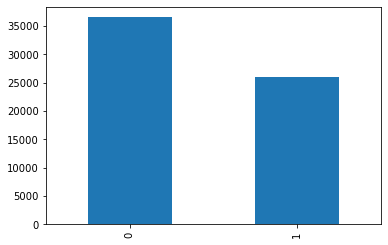

In [13]:
data["DebugSize"].value_counts().plot(kind = "bar")

## 2. Selection

In [14]:
# This is based off correlation between features of the dataset and labels.
data.drop(["FileName", "md5Hash", 'ExportSize', "IatVRA"], axis = 1, inplace = True)

data.head()

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,332,0,0,0,4,0,8,0,3,1048576,34112,672,0,1
1,34404,1,121728,10,10,126576,14,10,8,262144,16864,1024,0,1
2,332,0,0,0,4,0,8,0,3,1048576,34112,672,0,1
3,34404,1,19904,10,10,21312,14,10,6,262144,16736,1040,0,1
4,34404,1,97728,10,10,105792,14,10,7,262144,16736,1096,0,1


## 3. Splitting the data
We need to split the data for modelling. We shall adopt the following:
- Normal splitting
- Cross validation (K-Fold)

In [15]:
X = data.drop("Benign", axis = 1)
y = data["Benign"]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [17]:
from collections import Counter
import imblearn

In [18]:
"""
Before SMOTE_Tomek
"""
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print(counter_train, counter_test)



# creating imblearn resampling object
# sampling strategy is the propotion of output
# resampled data that is the minority class
over_and_under_sample =  imblearn.combine.SMOTETomek(sampling_strategy = 1.0, n_jobs = -1, random_state = 42)
x_train, y_train = over_and_under_sample.fit_resample(X, y)

# checking under- and over-sample ratios between train and test set.
# DO NOT resample the test set!
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print(counter_train, counter_test)

Counter({0: 28242, 1: 21746}) Counter({0: 7125, 1: 5372})
Counter({1: 35182, 0: 35182}) Counter({0: 7125, 1: 5372})


In [19]:
# A CUSTOM FUNCTION TO IMPLEMENT CROSS VALIDATION

def cross_validation(model, _X, _y, _cv=10):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
    return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean()*100,
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean()*100,
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean()*100,
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean()*100,
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean()*100,
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()*100
              }

## Part IV: Modelling Methodology
### Overview

This is the Machine Learning component of this solution to the task. The workflow for this notebook is outlined as follows:
- Pick algorithms to train on the data
- Make predictions on test data




In [20]:
#DECLARING THE ALGORITHM
model1 = RandomForestClassifier()

In [21]:
# Training With Cross Validation
model_result = cross_validation(model1, X, y, 10)
model_result

{'Training Accuracy scores': array([0.9996977 , 0.99962657, 0.99960879, 0.99957323, 0.99960879,
        0.99966214, 0.9996088 , 0.9996088 , 0.99967993, 0.9996088 ]),
 'Mean Training Accuracy': 99.96283552022449,
 'Training Precision scores': array([0.99975411, 0.99963119, 0.99971309, 0.99971307, 0.99967213,
        0.99979506, 0.99971309, 0.99967213, 0.99975411, 0.9997131 ]),
 'Mean Training Precision': 99.97131082012851,
 'Training Recall scores': array([0.99954929, 0.99950832, 0.9993854 , 0.99930345, 0.99942637,
        0.99942637, 0.9993854 , 0.99942637, 0.99950834, 0.99938542]),
 'Mean Training Recall': 99.9430472450381,
 'Training F1 scores': array([0.99965169, 0.99956975, 0.99954922, 0.99950822, 0.99954924,
        0.99961068, 0.99954922, 0.99954924, 0.99963121, 0.99954924]),
 'Mean Training F1 Score': 99.95717687137152,
 'Validation Accuracy scores': array([0.99359898, 0.99327892, 0.99535926, 0.99775964, 0.99535926,
        0.99535851, 0.99519846, 0.99759923, 0.99599872, 0.99679

In [22]:
len(y_train)

70364

In [23]:
len(y_test)

12497

In [24]:
# Training Without Cross Validation
model1.fit(x_train, y_train)
prediction = model1.predict_proba(x_test) [:, 1]

In [25]:
pred = model1.predict(x_test)
print(pred[:15], y_test[:15])

[0 1 1 0 0 1 0 1 0 1 1 1 0 1 1] 51802    0
15780    1
3788     1
58196    0
47275    0
3798     1
41296    0
26632    1
46207    0
10574    1
19214    1
7451     1
31785    0
12796    1
11821    1
Name: Benign, dtype: int64


# Evaluation

## Overview

This is the Evaluation component of this solution to the task. The workflow for this notebook is outlined as follows:
- Compare our model's prediction to the actual labels of the test data.
- Visualize some of these evaluations

We will consider the following metrics:
- Accuracy
- Precision
- Recall
- Confusion Matrix
- Area Under Curve (AUC)

In [26]:
# CUSTOM FUNCTION FOR VISUALIZING OUR RESULTS

# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
    # Set size of plot
    plt.figure(figsize=(12,6))
    labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold", "6th Fold", "7th Fold", "8th Fold", "9th Fold", "10th Fold"]
    X_axis = np.arange(len(labels))
    ax = plt.gca()
    plt.ylim(0.40000, 1)
    plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
    plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
    plt.title(plot_title, fontsize=30)
    plt.xticks(X_axis, labels)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

## 1. Accuracy

In [27]:
# model_name = "Random Forest"
# plot_result(model_name, "Accuracy", "Accuracy In 10 Folds",
#            model_result["Training Accuracy scores"],
#            model_result["Validation Accuracy scores"])


## 2. Precision

In [28]:
# plot_result(model_name, "Precision", "Precision Score In 10 Folds",
#            model_result["Training Precision scores"],
#            model_result["Validation Precision scores"])

## 3. Recall

In [29]:
# plot_result(model_name, "Recall", "Recall In 10 Folds",
#            model_result["Training Recall scores"],
#            model_result["Validation Recall scores"])

# 4. F1-Score

In [30]:
# model_name = "Random Forest"
# plot_result(model_name, "F1 scores", "F1 Scores In 10 Folds",
#            model_result["Training F1 scores"],
#            model_result["Validation F1 scores"])

In [31]:
predictions = model1.predict(x_test)
print(classification_report(predictions, y_test))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7134
           1       1.00      1.00      1.00      5363

    accuracy                           1.00     12497
   macro avg       1.00      1.00      1.00     12497
weighted avg       1.00      1.00      1.00     12497

[[7123    2]
 [  11 5361]]


# Adds On

- Training on data with K Nearest Neighbor
- Make prediction on test data


In [32]:
model2 = KNeighborsClassifier()


In [33]:
model2.fit(x_train, y_train)
model2.score(x_test, y_test)

0.9835160438505242

# EVALUATION OF KNN

In [34]:
# Training With Cross Validation
model_results = cross_validation(model2, X, y, 10)
model_results

{'Training Accuracy scores': array([0.98397823, 0.9835159 , 0.98364037, 0.98282239, 0.98292908,
        0.98289382, 0.98319612, 0.98316055, 0.98356954, 0.98362288]),
 'Mean Training Accuracy': 98.33328891761306,
 'Training Precision scores': array([0.98509927, 0.98492296, 0.98460713, 0.98385765, 0.98346255,
        0.98386032, 0.98363224, 0.9839901 , 0.98460523, 0.98432731]),
 'Mean Training Precision': 98.42364756664867,
 'Training Recall scores': array([0.97787429, 0.97697288, 0.97758748, 0.97644022, 0.9770958 ,
        0.97660411, 0.9775465 , 0.9770958 , 0.97742451, 0.97783423]),
 'Mean Training Recall': 97.72475815015274,
 'Training F1 scores': array([0.98147349, 0.98093181, 0.98108475, 0.9801349 , 0.98026884,
        0.98021879, 0.98057993, 0.98053083, 0.98100173, 0.98107003]),
 'Mean Training F1 Score': 98.07295081656156,
 'Validation Accuracy scores': array([0.96703473, 0.97151544, 0.96959514, 0.97823652, 0.97599616,
        0.97519206, 0.97135083, 0.98015365, 0.96959027, 0.9729

# 1. Accuracy

In [35]:
# plot_result(model_name, "Accuracy", "Accuracy In 10 Folds",
#            model_results["Training Accuracy scores"],
#            model_results["Validation Accuracy scores"])

# 2. Precision

In [36]:
# plot_result(model_name, "Precision", "Precision Score In 10 Folds",
#            model_results["Training Precision scores"],
#            model_results["Validation Precision scores"])

# 3 Recall

In [37]:
# plot_result(model_name, "Recall", "Recall In 10 Folds",
#            model_results["Training Recall scores"],
#            model_results["Validation Recall scores"])

# 4. F1 Scores

In [38]:
# model_name = "K Nearest Neighbors"
# plot_result(model_name, "F1 scores", "F1 Scores In 10 Folds",
#            model_results["Training F1 scores"],
#            model_results["Validation F1 scores"])

In [39]:
prediction2 = model2.predict(x_test)

In [40]:
print(classification_report(prediction2, y_test))
print(confusion_matrix(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7125
           1       0.98      0.98      0.98      5372

    accuracy                           0.98     12497
   macro avg       0.98      0.98      0.98     12497
weighted avg       0.98      0.98      0.98     12497

[[7022  103]
 [ 103 5269]]


# Neive Bayes

In [41]:
# Training With Cross Validation
model3 = GaussianNB()
model_result3 = cross_validation(model3, X, y, 10)
model_result3

{'Training Accuracy scores': array([0.43272992, 0.43296109, 0.43425919, 0.78126111, 0.43233872,
        0.43208208, 0.43220655, 0.43220655, 0.43238437, 0.43286448]),
 'Mean Training Accuracy': 46.75294086634051,
 'Training Precision scores': array([0.43299061, 0.43310804, 0.43377845, 0.86171039, 0.43278911,
        0.43262246, 0.43269351, 0.43270796, 0.43278829, 0.43308846]),
 'Mean Training Precision': 47.582772834242746,
 'Training Recall scores': array([0.99217406, 0.99246087, 0.99426371, 0.59079734, 0.9916414 ,
        0.99078096, 0.99106777, 0.99131361, 0.99119105, 0.99274798]),
 'Mean Training Recall': 95.18438747069004,
 'Training F1 scores': array([0.60288058, 0.60304735, 0.60403002, 0.70098933, 0.60258693,
        0.6022665 , 0.60238833, 0.60244774, 0.60250296, 0.60308136]),
 'Mean Training F1 Score': 61.26221107127653,
 'Validation Accuracy scores': array([0.43078893, 0.43350936, 0.43078893, 0.71963514, 0.43446952,
        0.434379  , 0.43325864, 0.43421895, 0.43085787, 0.430

In [42]:
model3.fit(x_train, y_train)
model3.score(x_test, y_test)

prediction3 = model3.predict(x_test)
print(classification_report(prediction3, y_test))
print(confusion_matrix(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.00      0.38      0.01        66
           1       0.99      0.43      0.60     12431

    accuracy                           0.43     12497
   macro avg       0.50      0.40      0.30     12497
weighted avg       0.99      0.43      0.60     12497

[[  25 7100]
 [  41 5331]]


# Ada Boost Classifier

In [43]:
# Training With Cross Validation
model4 = AdaBoostClassifier()
model_result4 = cross_validation(model4, X, y, 10)
model_result4

{'Training Accuracy scores': array([0.98589871, 0.98282239, 0.98428053, 0.98223558, 0.98198663,
        0.98529438, 0.98417412, 0.98275157, 0.98246706, 0.98383626]),
 'Mean Training Accuracy': 98.35747234451384,
 'Training Precision scores': array([0.98488644, 0.97875817, 0.98043301, 0.97876866, 0.97785676,
        0.98402923, 0.98054602, 0.97942067, 0.97901583, 0.98061032]),
 'Mean Training Precision': 98.04325122720343,
 'Training Recall scores': array([0.98258625, 0.98172581, 0.98340572, 0.98033271, 0.98070147,
        0.98205359, 0.98303696, 0.98086536, 0.98062031, 0.98217724]),
 'Mean Training Recall': 98.17505416800864,
 'Training F1 scores': array([0.983735  , 0.98023974, 0.98191711, 0.97955006, 0.97927705,
        0.98304042, 0.98178991, 0.98014248, 0.97981742, 0.98139316]),
 'Mean Training F1 Score': 98.1090235169389,
 'Validation Accuracy scores': array([0.98223716, 0.97679629, 0.98159706, 0.98639782, 0.98607777,
        0.98735595, 0.97903329, 0.98639565, 0.9796735 , 0.98015

In [44]:
model4.fit(x_train, y_train)
model4.score(x_test, y_test)

prediction4 = model4.predict(x_test)
print(classification_report(prediction4, y_test))
print(confusion_matrix(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7075
           1       0.98      0.97      0.98      5422

    accuracy                           0.98     12497
   macro avg       0.98      0.98      0.98     12497
weighted avg       0.98      0.98      0.98     12497

[[7022  103]
 [ 103 5269]]


# Logistic Regression Classifier

In [45]:
# Training With Cross Validation
model5 = LogisticRegression()
model_result5 = cross_validation(model5, X, y, 10)
model_result5

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'Training Accuracy scores': array([0.78053204, 0.79139697, 0.78716481, 0.79212604, 0.79129028,
        0.79657521, 0.78357665, 0.78524815, 0.78590608, 0.78167399]),
 'Mean Training Accuracy': 78.75490202360294,
 'Training Precision scores': array([0.87266774, 0.8782453 , 0.87287882, 0.87894862, 0.87766053,
        0.88126323, 0.87486978, 0.87485558, 0.8754174 , 0.87354481]),
 'Mean Training Precision': 87.60351807583679,
 'Training Recall scores': array([0.57875113, 0.60292551, 0.59645169, 0.60423666, 0.60317135,
        0.61398836, 0.5849791 , 0.58948619, 0.59077314, 0.58106281]),
 'Mean Training Recall': 59.45825951161652,
 'Training F1 scores': array([0.69594994, 0.71499721, 0.70866295, 0.7161519 , 0.71497608,
        0.72373823, 0.7011418 , 0.70436464, 0.70546504, 0.69789873]),
 'Mean Training F1 Score': 70.83346523556467,
 'Validation Accuracy scores': array([0.84525524, 0.75116019, 0.82845255, 0.73211714, 0.73851816,
        0.6909411 , 0.81946223, 0.81978233, 0.80025608, 0.8461

In [46]:
model5.fit(x_train, y_train)
model5.score(x_test, y_test)

prediction5 = model5.predict(x_test)
print(classification_report(prediction5, y_test))
print(confusion_matrix(y_test, prediction5))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      7372
           1       0.81      0.84      0.82      5125

    accuracy                           0.85     12497
   macro avg       0.85      0.85      0.85     12497
weighted avg       0.85      0.85      0.85     12497

[[6328  797]
 [1044 4328]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SDDClassifier

In [47]:
# Training With Cross Validation
model6 = SGDClassifier()
model_result6 = cross_validation(model6, X, y, 10)
model_result6

{'Training Accuracy scores': array([0.7368056 , 0.76257202, 0.76081158, 0.70751832, 0.73508073,
        0.85690915, 0.79008482, 0.74580792, 0.82989847, 0.73890855]),
 'Mean Training Accuracy': 76.64397154689074,
 'Training Precision scores': array([0.71370089, 0.85997134, 0.78547975, 0.70717484, 0.70660582,
        0.84105408, 0.69688447, 0.7707675 , 0.7930803 , 0.78211675]),
 'Mean Training Precision': 76.56835739278193,
 'Training Recall scores': array([0.65717447, 0.5410145 , 0.61751209, 0.5565025 , 0.66618864,
        0.8264771 , 0.91375072, 0.58965009, 0.82271479, 0.5522596 ]),
 'Mean Training Recall': 67.43244490109292,
 'Training F1 scores': array([0.68427228, 0.66418511, 0.69144129, 0.62285609, 0.68580226,
        0.83370187, 0.79071746, 0.66815238, 0.80762579, 0.64739079]),
 'Mean Training F1 Score': 70.96145326925235,
 'Validation Accuracy scores': array([0.71195391, 0.81629061, 0.79724756, 0.67898864, 0.76300208,
        0.88108195, 0.78953265, 0.77736876, 0.83754802, 0.7424

In [48]:
model6.fit(x_train, y_train)
model6.score(x_test, y_test)

prediction6 = model6.predict(x_test)
print(classification_report(prediction6, y_test))
print(confusion_matrix(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      8033
           1       0.69      0.83      0.76      4464

    accuracy                           0.81     12497
   macro avg       0.79      0.81      0.80     12497
weighted avg       0.82      0.81      0.81     12497

[[7022  103]
 [ 103 5269]]


# Support Vector Machine Classifier

In [49]:
model7 = SVC()
model7.fit(x_train, y_train)
model7.score(x_test, y_test)

prediction7 = model7.predict(x_test)

print(classification_report(prediction7, y_test))
print(confusion_matrix(y_test, prediction7))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      8780
           1       0.61      0.87      0.72      3717

    accuracy                           0.79     12497
   macro avg       0.77      0.82      0.78     12497
weighted avg       0.84      0.79      0.80     12497

[[6659  466]
 [2121 3251]]


# AUC Curves

<Figure size 432x288 with 0 Axes>

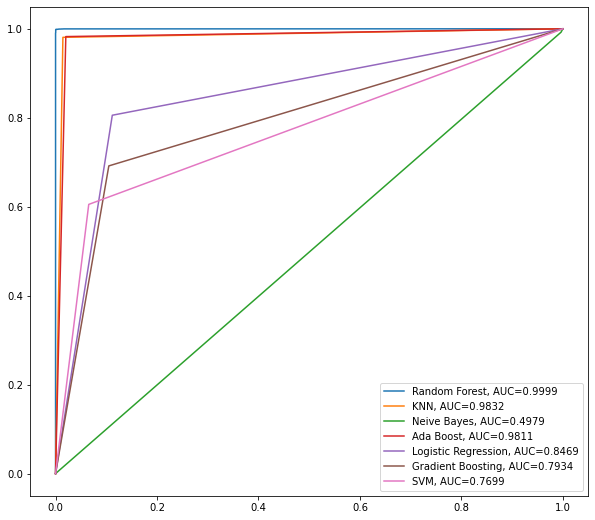

In [50]:
#set up plotting area
plt.figure().clf()
plt.figure(figsize=(10, 9))
#fit Random Forest model and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, prediction)
auc = round(metrics.roc_auc_score(y_test, prediction), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#fit KNN and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, prediction2)
auc = round(metrics.roc_auc_score(y_test, prediction2), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

#fit Neive Bayes and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, prediction3)
auc = round(metrics.roc_auc_score(y_test, prediction3), 4)
plt.plot(fpr,tpr,label="Neive Bayes, AUC="+str(auc))

#fit ADA Boost and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, prediction4)
auc = round(metrics.roc_auc_score(y_test, prediction4), 4)
plt.plot(fpr,tpr,label="Ada Boost, AUC="+str(auc))


#fit logistic regression model and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, prediction5)
auc = round(metrics.roc_auc_score(y_test, prediction5), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, prediction6)
auc = round(metrics.roc_auc_score(y_test, prediction6), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#fit SVM model and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, prediction7)
auc = round(metrics.roc_auc_score(y_test, prediction7), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

#add legend
plt.legend()


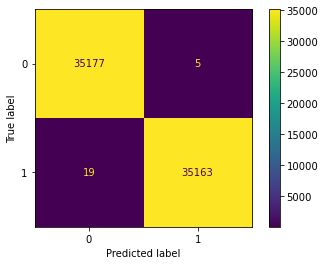

In [51]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
M = confusion_matrix(predictions, y_test)
tn, fp, fn, tp = M.ravel()
plot_confusion_matrix(model1, x_train, y_train)